<a href="https://colab.research.google.com/github/Bizvantis/Water-contamination/blob/main/Water_contanimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE

In [20]:
df = pd.read_csv('/content/water_potabilityFinal.csv')
df

,ph,Tds,Conductivity,Turbidity,Water Safe
0,NaN,20791.31898,564.308654,2.963135,0
1,3.716080,18630.05786,592.885359,4.500656,0
2,8.099124,19909.54173,418.606213,3.055934,0
3,8.316766,22018.41744,363.266516,4.628771,0
4,9.092223,17978.98634,398.410813,4.075075,0
...,...,...,...,...,...
3271,4.668102,47580.99160,526.424171,4.435821,1
3272,7.808856,17329.80216,392.449580,2.798243,1
3273,9.419510,33155.57822,432.044783,3.298875,1
3274,5.126763,11983.86938,402.883113,4.708658,1


In [21]:
df[df['ph'].isnull()]

,ph,Tds,Conductivity,Turbidity,Water Safe
0,NaN,20791.318980,564.308654,2.963135,0
8,NaN,14285.583850,389.375566,3.595017,0
13,NaN,27331.361960,379.761835,4.413974,0
20,NaN,22305.567410,554.820087,4.133423,0
22,NaN,17107.224230,436.256194,5.459251,0
...,...,...,...,...,...
3224,NaN,31081.735260,517.925946,3.345543,1
3229,NaN,10643.186770,384.597711,3.065910,1
3231,NaN,28194.452650,418.272901,3.855895,1
3245,NaN,24711.414930,555.548534,4.331691,1


<Axes: xlabel='Tds', ylabel='Count'>

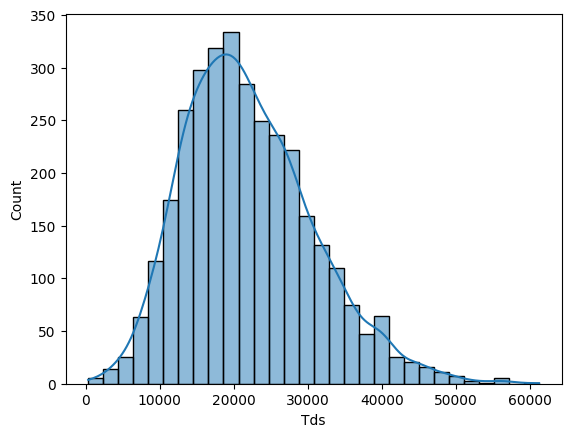

In [22]:
sns.histplot(data=df,x='Tds', bins=30, kde=True)

In [23]:
df['ph'].fillna(df['ph'].mean(), inplace=True)

/tmp/ipython-input-428/476643785.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].mean(), inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ph            3276 non-null   float64
 1   Tds           3276 non-null   float64
 2   Conductivity  3276 non-null   float64
 3   Turbidity     3276 non-null   float64
 4   Water Safe    3276 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 128.1 KB


In [74]:
X = df.drop("Water Safe", axis=1)
y = df["Water Safe"]

In [75]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, random_state=42)

In [76]:
model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [77]:
print(df.corr()["Water Safe"].sort_values(ascending=False))

Water Safe      1.000000
Tds             0.033743
Turbidity       0.001581
ph             -0.003287
Conductivity   -0.008128
Name: Water Safe, dtype: float64


In [78]:
print(y.value_counts(normalize=True))

Water Safe
0    0.60989
1    0.39011
Name: proportion, dtype: float64


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [80]:
param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [81]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 400]},
             scoring='accuracy')

In [82]:
print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.600609756097561

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.93      0.74       400
           1       0.44      0.09      0.15       256

    accuracy                           0.60       656
   macro avg       0.53      0.51      0.45       656
weighted avg       0.55      0.60      0.51       656



In [83]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Define model
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)

# Stratified K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---------------------------
# 1️⃣ Cross-Validation Accuracy
# ---------------------------
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# ---------------------------
# 2️⃣ Cross-Validated Predictions
# ---------------------------
y_pred_cv = cross_val_predict(model, X, y, cv=kfold)

# ---------------------------
# 3️⃣ Confusion Matrix
# ---------------------------
cm = confusion_matrix(y, y_pred_cv)

print("\nCross-Validated Confusion Matrix:")
print(cm)

# ---------------------------
# 4️⃣ Classification Report
# ---------------------------
print("\nClassification Report:")
print(classification_report(y, y_pred_cv))

Cross-Validation Accuracy Scores: [0.58384146 0.57251908 0.58778626 0.57862595 0.59083969]
Mean CV Accuracy: 0.5827224911562092

Cross-Validated Confusion Matrix:
[[1642  356]
 [1011  267]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.71      1998
           1       0.43      0.21      0.28      1278

    accuracy                           0.58      3276
   macro avg       0.52      0.52      0.49      3276
weighted avg       0.54      0.58      0.54      3276

